In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('./wine.csv')
wine.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine = wine.drop('Cultivar', axis=1)

### K-Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)

In [7]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [8]:
import numpy as np


In [9]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([69, 47, 62]))

In [11]:
len(kmeans.labels_),len(wine)

(178, 178)

In [12]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
kmeans_3.head()

,cluster
0,1
1,1
2,1
3,1
4,2


In [13]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2).fit(wine)
pca.singular_values_


array([4190.31224906,  174.75337527])

In [15]:
pca_trans = pca.transform(wine)

In [16]:
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])
pca_trans_df.head()

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [17]:
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.head()

,cluster,pca1,pca2
0,1,318.562979,21.492131
1,1,303.097420,-5.364718
2,1,438.061133,-6.537309
3,1,733.240139,0.192729
4,2,-11.571428,18.489995


In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

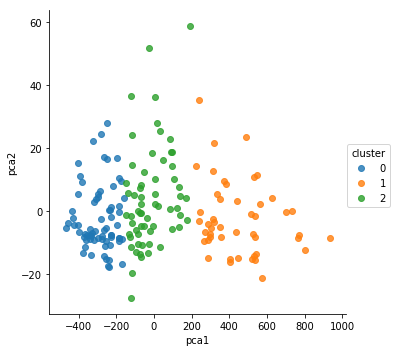

In [26]:
sns.lmplot(x='pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)